#Dados do Metrô

In [ ]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
metro = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/Transporte/Metrô/Estações_Metrô.geojson')
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
rj = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/DATASET/DATASET.shp')

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


#Agregando outros tipos de transporte

**Fonte de dados**

Trens e BRT

https://www.data.rio/

In [ ]:
brt = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/Transporte/BRT/Esta%C3%A7%C3%B5es_BRT.geojson')
trem = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/Transporte/Trem/Esta%C3%A7%C3%B5es_Trem.geojson')

In [ ]:
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


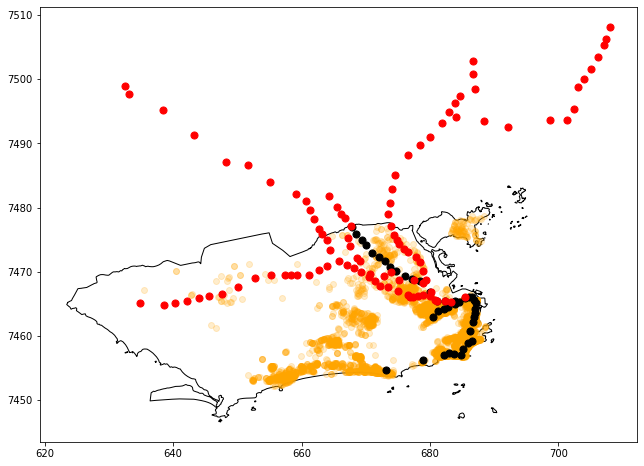

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)

In [ ]:
trem = trem[trem.within(rj.iloc[0].geometry)]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


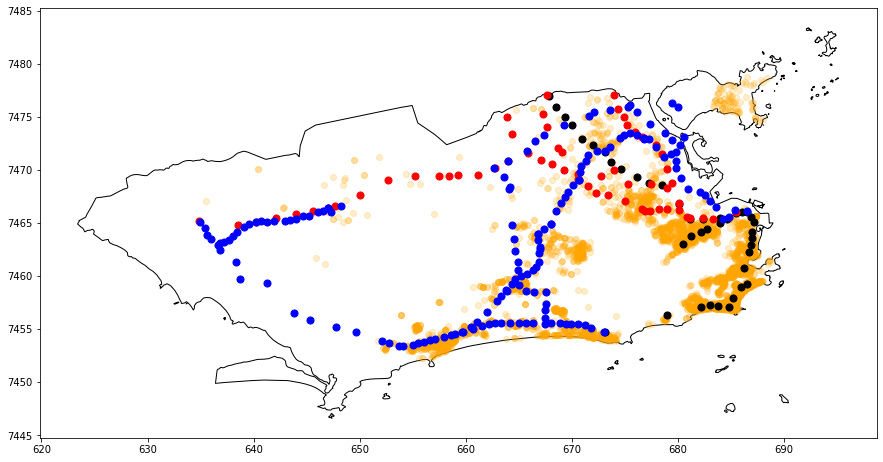

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)
brt.plot(ax=base, color='blue', markersize= 50)

##Exercício de revisão

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


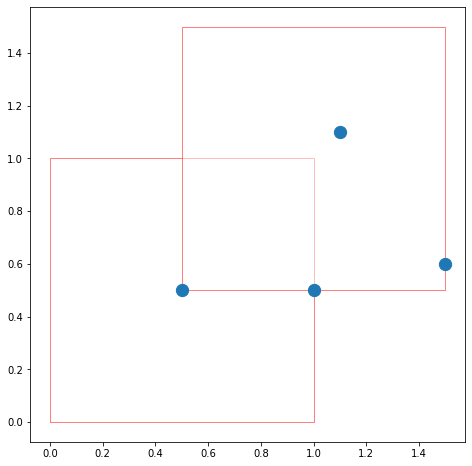

In [ ]:
from shapely.geometry import Point, Polygon

Square = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
Square2 = Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)])

Point_A = Point(1.1, 1.1)
Point_B = Point(0.5, 0.5)
Point_C = Point(1.0, 0.5)
Point_D = Point(1.5, 0.6)

points = gpd.GeoDataFrame(geometry=[ Point_A, Point_B, Point_C, Point_D], index=['A', 'B', 'C', 'D'])
polygon = gpd.GeoDataFrame(geometry=[Square,  Square2], index=['P','P2'])

base = polygon.plot(color='white', edgecolor='red', figsize=(15,8), alpha = 0.5)
points.plot(ax=base, markersize=150)

In [ ]:
polygon['geometry'].apply(lambda x: points.distance(x))['A'].iloc[1]

0.0

##Juntando os GeoDataFrames

In [ ]:
transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index = True)
transporte

0      POINT (676.866 7466.079)
1      POINT (663.964 7470.815)
2      POINT (662.792 7470.218)
3      POINT (661.119 7469.485)
4      POINT (659.274 7469.469)
                 ...           
257    POINT (664.056 7468.207)
258    POINT (663.576 7469.330)
259    POINT (662.677 7470.133)
260    POINT (663.983 7470.796)
261    POINT (664.181 7468.397)
Length: 262, dtype: geometry

In [ ]:
geo_dados['Dist_Transporte'] = geo_dados['geometry']. apply(lambda x: transporte.distance(x).min())

In [ ]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832),0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803),3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440),0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284),0.422370
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574),0.214605


In [ ]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040
Dist_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000


In [ ]:
geo_dados.to_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/DATASET/DATASET.shp')

In [ ]:
A = pd.DataFrame([1, 2], columns=['A'])
B = pd.DataFrame([3, 4], columns=['A'])
C = pd.DataFrame([5, 6], columns=['A'])

A.merge(B, how='outer').merge(C, how='outer')

,A
0,1
1,2
2,3
3,4
4,5
5,6
